# Datos y Modelos<a class="tocSkip">
## Inteligencia Artificial - Machine Learning<a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**
**Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**


---

# Datos y Modelos


In [5]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [4]:
df = pd.read_csv('survey_2022_processed.csv')

In [6]:
df[:3]

,work_province,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,...,work_listen_more_men,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,work_lastyear_discrimination,¿Salir o seguir contestando?.3,company_days_in_the_office,company_pandemic_support,company_new_benefits,profile_age,profile_gender
0,Catamarca,Tercerizado (trabajo a través de consultora o ...,207000,150000.0,NaN,NaN,2,1,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,Varón Cis
1,Catamarca,Full-Time,130000,99000.0,NaN,NaN,3,4,Un sueldo,Performance de la compañía,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,Varón Cis
2,Catamarca,Full-Time,185000,145000.0,Mi sueldo está dolarizado (pero cobro en moned...,100,2,2,De uno a tres sueldos,Performance grupal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,Varón Trans


In [15]:
df['salary_monthly_BRUTO'] = df['salary_monthly_BRUTO'].str.replace(',', '.')

In [16]:
df['salary_monthly_BRUTO'] = pd.to_numeric(df['salary_monthly_BRUTO'], errors='coerce')

In [17]:
df

,work_province,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,...,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,work_lastyear_discrimination,¿Salir o seguir contestando?.3,company_days_in_the_office,company_pandemic_support,company_new_benefits,profile_age,profile_gender,salary_monthly_BRUTO_1
0,Catamarca,Tercerizado (trabajo a través de consultora o ...,207000.0,150000.0,NaN,NaN,2,1,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,Varón Cis,207000
1,Catamarca,Full-Time,130000.0,99000.0,NaN,NaN,3,4,Un sueldo,Performance de la compañía,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,Varón Cis,130000
2,Catamarca,Full-Time,185000.0,145000.0,Mi sueldo está dolarizado (pero cobro en moned...,100,2,2,De uno a tres sueldos,Performance grupal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,Varón Trans,185000
3,Catamarca,Full-Time,70000.0,60000.0,NaN,NaN,3,3,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,Varón Cis,70000
4,Catamarca,Full-Time,90000.0,74700.0,NaN,NaN,3,2,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,Mujer Cis,90000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5849,Tucumán,Full-Time,280000.0,280000.0,Cobro en dólares,200,4,4,Menos de un sueldo,Performance grupal,...,NaN,No,Nunca,Quiero responder más preguntas,0.0,10.0,Ninguna de las anteriores,23,Varón Cis,280000
5850,Tucumán,Full-Time,60000.0,54000.0,NaN,NaN,2,1,Menos de un sueldo,Performance individual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,Varón Cis,60000
5851,Tucumán,Remoto (empresa de otro país),440000.0,400000.0,"Cobro en dólares, Cobro parte de mi sueldo en ...",NaN,3,3,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,Mujer Cis,440000
5852,Tucumán,Full-Time,59500.0,49385.0,NaN,NaN,2,2,Un sueldo,Performance individual,...,NaN,No,Nunca,Quiero responder más preguntas,0.0,8.0,Ninguna de las anteriores,31,Varón Cis,59500


# Estadística descriptiva

Hemos estado organizando y visualizando los datos de distintas maneras, pero ¿qué intuiciones podemos obtener?

Las visualizaciones como histogramas o gráficos de conteo muestran la cantidad de veces que se observa cada valor en un conjunto de realizaciones de una variable aleatoria. Esto se denomina análisis de frecuencia, y es parte de la **estadística descriptiva**.

El uso de visualizaciones nos limita a estimaciones, pero los datos crudos son demasiado como para intepretarlos en conjunto. Para eso, la estadística descriptiva provee también medidas de tendencia central y de dispersión, que resumen en un valor numérico propiedades de las realizaciones de la variable.

Retomemos el problema original con la v.a. `salary_monthly_NETO`, ¿qué información brindan las siguientes métricas y cómo usarlas?


In [18]:
salary_col='salary_monthly_BRUTO'

In [19]:
(df[salary_col].describe().apply(lambda s: '{0:.2f}'.format(int(s))))

count       5784.00
mean      259943.00
std       301635.00
min            0.00
25%       115000.00
50%       187000.00
75%       300000.00
max      8400000.00
Name: salary_monthly_BRUTO, dtype: object

## Medidas de tendencia central

Cuando se quiere obtener un valor representativo de todas las realizaciones de una v.a., o su centro, se utiliza una *medida de tendencia central*.

Repasando, dada una característica de interés (modelada por X v.a.) y un conjunto de observaciones $x = \{ x_1, x_2 ... \}$ donde $x_i = X(\omega_i)$ para algún $\omega_i \in \Omega$, y $N = |x|$:

* La **media muestral** (aritmética) o promedio se calcula como:

$$ \bar{x} = \frac{1}{N} \sum_i^N x_i $$

* La **mediana** se calcula:
  1. Ordenar las realizaciones tal que $x_j \leq x_{j+1}$ 
  2. Si la cantidad de datos $N$ es impar, la mediana es el valor central: $median = x_{\lfloor N / 2 \rfloor +1}$
  3. Si la cantidad de datos $N$ es par, la mediana es e promedio de los dos valores centrales: $median = \frac{1}{2} (x_{ N / 2 } + x_{ (N / 2) +1})$

* La **moda** son los valores o él valor con mayor frecuencia, es decir, los o él que más se repite.


In [20]:
(df[salary_col].astype(float).mean(), df[salary_col].astype(float).median())

(259943.39225259336, 187000.0)

**¿Por qué las dos medidas son tan distintas?**

* La media se puede interpretar como el *centro de masa* del histograma. Es decir, si el histograma fuera una figura de madera, el punto de equilibrio donde podemos apoyarlo y no se cae es la media.
* La media es muy sensible a valores extremos. 
* La mediana es más robusta a valores extremos.
* Si la distribución de los datos es simétrica, las medidas coinciden. (Luego, si no coinciden es porque la distribución no es simétrica)

**¿Se cumple para estos datos?**

In [21]:
max_salaries = [df[salary_col].max(), 10**6, 500000, 400000, 300000, 200000]
central_tendency = [
    (max_salary, df[df[salary_col] < max_salary][salary_col].mean(),
     df[df[salary_col] < max_salary][salary_col].median())
    for max_salary in max_salaries
]
central_tendency

[(8400000.0, 258535.80854037698, 187000.0),
 (1000000, 224182.92436659551, 180000.0),
 (500000, 186862.72501812223, 170000.0),
 (400000, 170412.05292537008, 162000.0),
 (300000, 147455.25696555767, 150000.0),
 (200000, 112454.44280006512, 120000.0)]

Se pueden graficar estos números para lograr una mejor intuición de la magnitud de las diferencias. Además, al mostrar una visualización se pueden incluir más puntos.

Para poder crear gráficos de seaborn con distintos grupos de datos, muchas veces es necesario cambiar el formato del dataframe de wide a long. Ver [este link](https://anvil.works/blog/tidy-data) para más información.

In [22]:
central_tendency_max = [
    (max_salary, df[df[salary_col] < max_salary][salary_col].mean(),
     df[df[salary_col] < max_salary][salary_col].median())
    for max_salary in range(50000, int(df[salary_col].max()), 10**4)
]
central_tendency_max_df = pd.DataFrame(central_tendency_max,
                                   columns=['max_salary', 'mean', 'median'])\
  .melt(id_vars='max_salary', var_name='metric')

central_tendency_max_df[:3]

,max_salary,metric,value
0,50000,mean,11439.158082
1,60000,mean,17801.840968
2,70000,mean,28049.074663


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packa

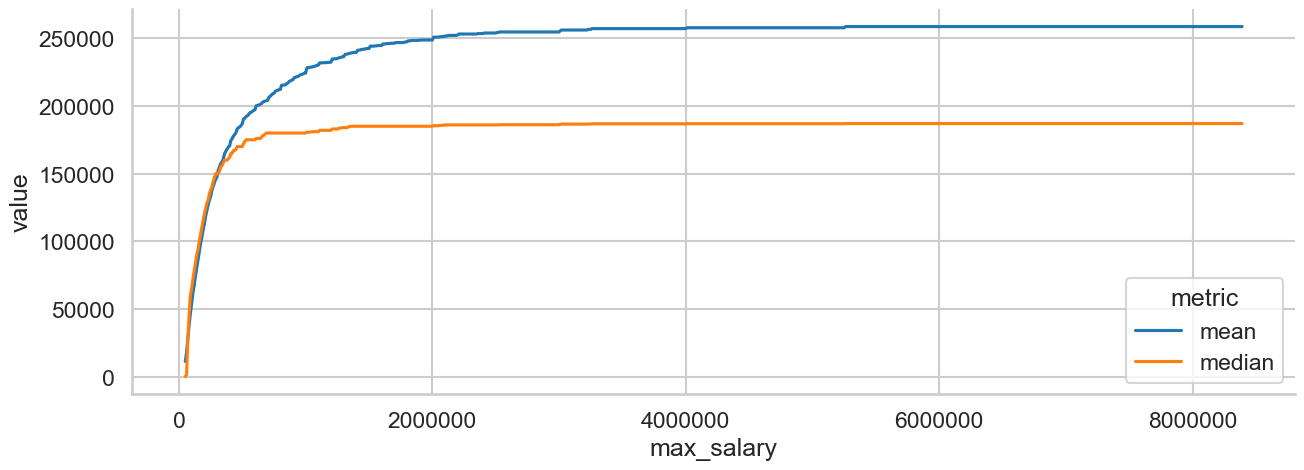

In [23]:
# ¡Podemos ver estos datos visualmente! valga la redundancia!!
fig = plt.figure(figsize=(15, 5))
seaborn.lineplot(data=central_tendency_max_df, x='max_salary', y='value', hue='metric')
plt.ticklabel_format(style='plain', axis='x')
seaborn.despine()

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


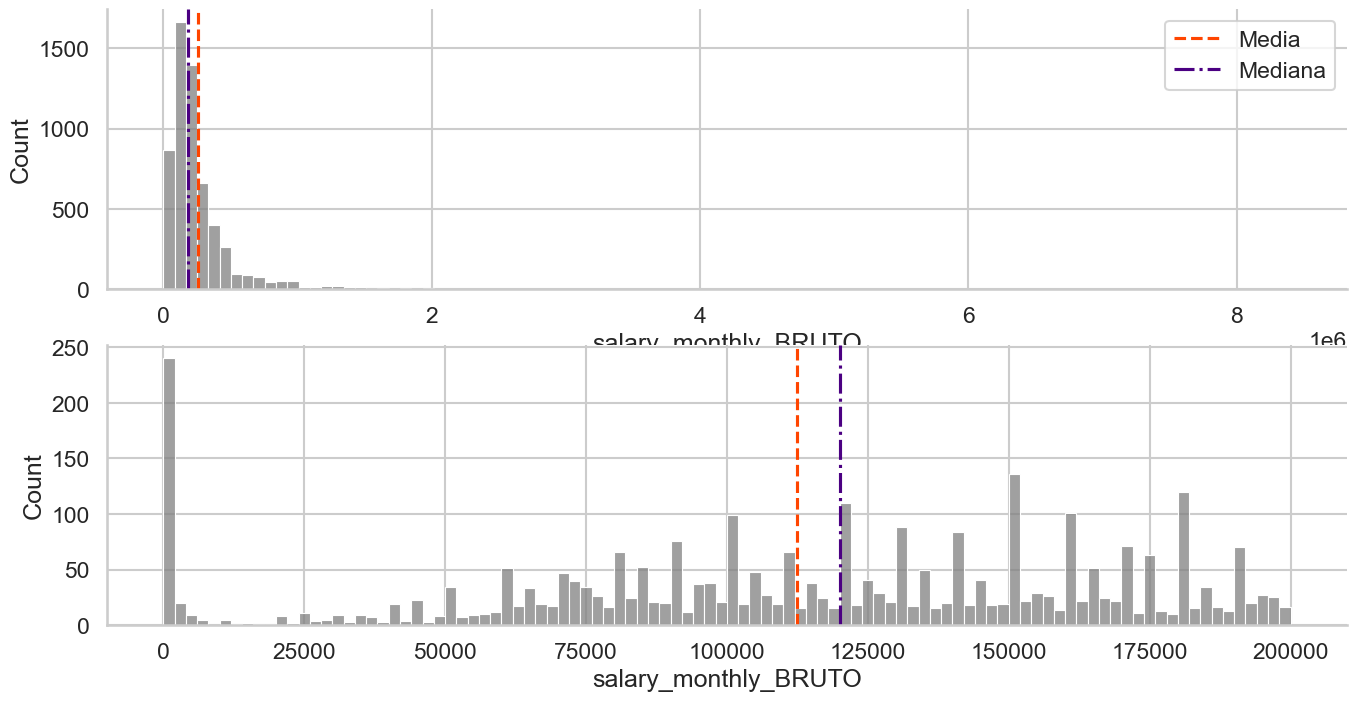

In [24]:
## La diferencia no siempre se aprecia en los gráficos
fig, axes = plt.subplots(nrows=2, figsize=(16, 8))
seaborn.histplot(df[salary_col], bins=100, ax=axes[0], color='gray')
axes[0].axvline(df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana')

filtered_df = df[df[salary_col] < 200000]
seaborn.histplot(filtered_df[salary_col], bins=100, ax=axes[1], color='gray')
axes[1].axvline(filtered_df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(filtered_df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana')

axes[0].legend()
seaborn.despine()

¿Qué decir de la moda? 

In [25]:
df.profile_gender.mode()

0    Varón Cis
Name: profile_gender, dtype: object

## Medidas de dispersión

Las medidas de dispersión vistas en el teórico son la desviación estándar, la varianza, y el coeficiente de variación. También permiten representar con un número alguna propiedad de los datos.

Por ejemplo, comparemos el salario neto con el salario bruto. A priori, **¿deberíamos ver alguna diferencia?**

In [26]:
df[['salary_monthly_NETO', 'salary_monthly_BRUTO']].describe().round()

,salary_monthly_NETO,salary_monthly_BRUTO
count,5600.0,5784.0
mean,201981.0,259943.0
std,268601.0,301635.0
min,1.0,0.0
25%,95000.0,115000.0
50%,150000.0,187000.0
75%,210000.0,300000.0
max,10023000.0,8400000.0


Claramente, ambas distribuciones están centradas en valores distintos, pero ¿podemos decir algo sobre su dispersión?

Cuando se comparan dos características diferentes (que pueden tener magnitudes diferentes) puede no ser conveniente comparar directamente los valores de las desviaciones estándar, sino que podemos usar el coeficiente de variación (desviación estándar dividida la media).

In [27]:
import scipy

print("Coeficiente de variación salario bruto",
      scipy.stats.variation(df.salary_monthly_BRUTO))
print("Coeficiente de variación salario neto",
      scipy.stats.variation(df.salary_monthly_NETO.dropna()))

Coeficiente de variación salario bruto nan
Coeficiente de variación salario neto 1.329717940929707


## Percentiles y gráficos de caja

Los gráficos de caja son otra forma de representar la distribución de las realizaciones de una v.a. numérica, de una forma más condensada que un histograma.

Son muy útiles para comparar muchas distribuciones, pero sólo cuando son muy distintas entre ellas, ya que oscurecen algunas sutilezas. Otros problema de este tipo de gráficos es que *no todo el mundo recuerda cómo leerlos*.

En estadística descriptiva, un gráfico de caja es un método para representar gráficamente grupos de datos numéricos a través de sus cuartiles. Los gráficos de caja también pueden tener líneas que se extienden verticalmente desde las cajas (bigotes) indicando la variabilidad fuera de los cuartiles superior e inferior. Los valores atípicos pueden representarse como puntos individuales.

La definición anterior sugiere que, si hay un valor atípico, se representará como un punto en el diagrama de caja, mientras que el resto de los datos de la muestra se agrupará y se mostrará en forma de cajas. Intentemos verlo nosotros mismos.
<center>
<img src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" height="300" />
</center>

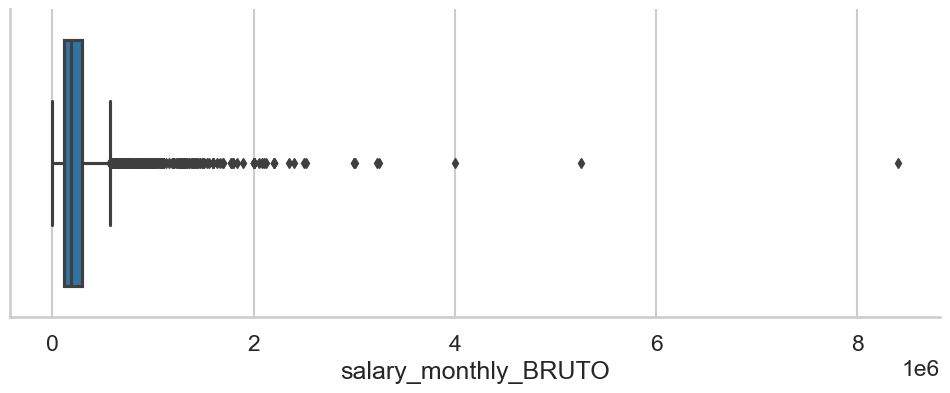

In [28]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df[salary_col])
seaborn.despine()

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='profile_age', ylabel='Count'>

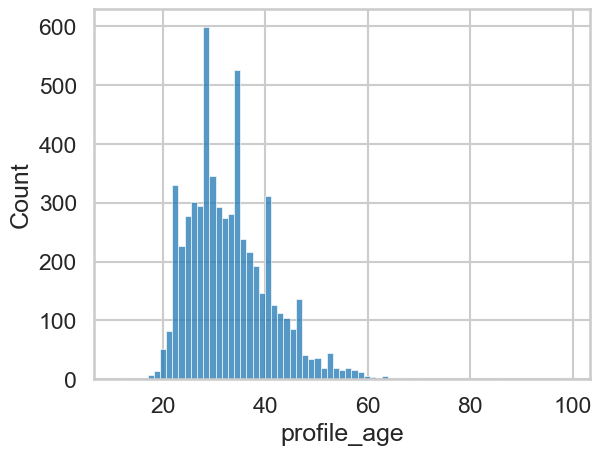

In [31]:
seaborn.histplot(df[df.profile_age < 100].profile_age)

<Axes: xlabel='profile_age'>

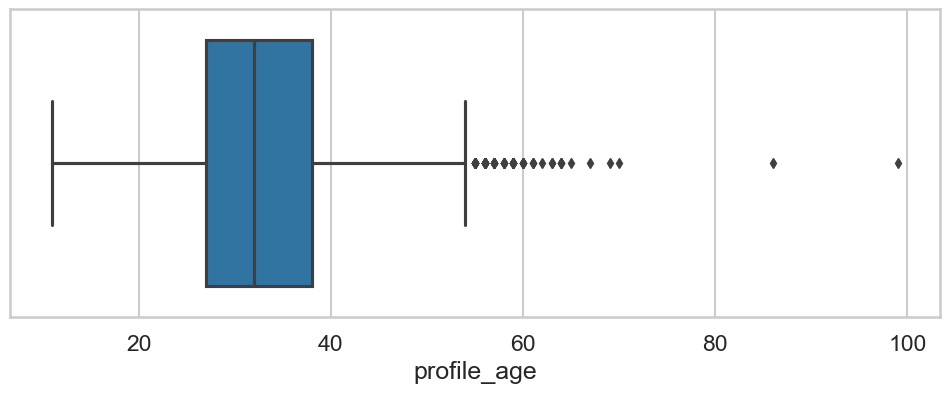

In [32]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df[df.profile_age < 100].profile_age)

Por ejemplo, podemos comparar la distribución de los salarios netos con respecto al nivel de estudios alcanzado.

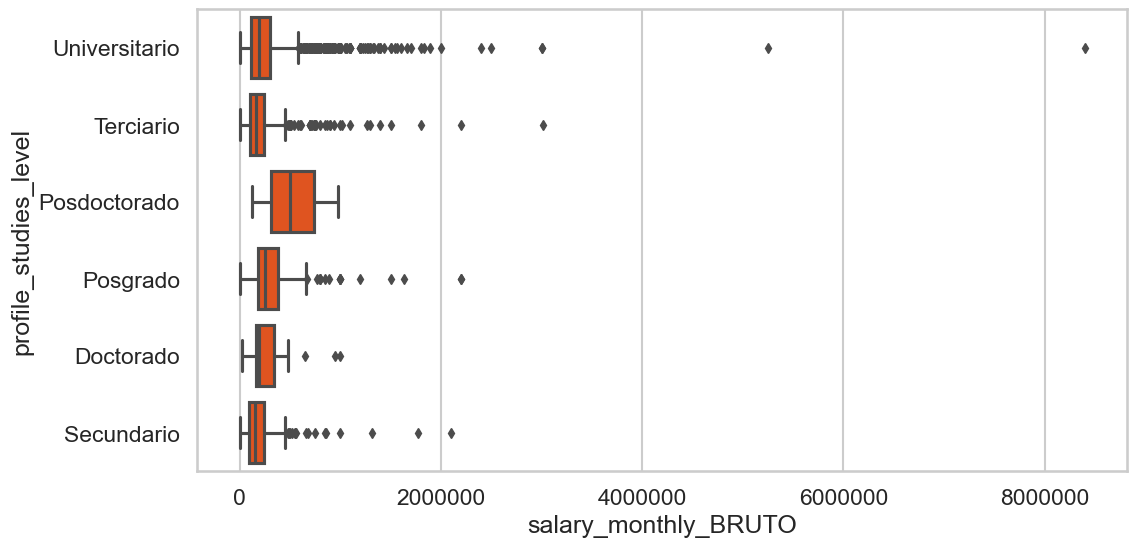

In [33]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df, x=salary_col, y='profile_studies_level',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

**¿Qué puede estar causando una diferencia tan grande en la distribución para las respuestas que dicen Posdoctorado?**

### Boxenplots

Los boxplots tienen una gran desventaja: ocultan mucha información en la distribución de las colas. Por ejemplo, para la categoría Posdoctorado, sabemos que el 25% de los valores de sueldo neto es mayor que los ~650000 pesos. Pero no conocemos cómo se distribuyen. Para conjuntos de datos de gran tamaño, el 25% de los datos contiene mucha información.

Un gráfico más informativo es el **boxenplot**, que visualiza más percentiles. Otra ventaja es la percepción del mismo debido al peso visual de las cajas: los datos en el rango intercuartílico no parecen muuuucho más importantes que los datos en las colas.

Sin embargo, es aún más difícil de leer si buscamos exactitud, ya que los percentiles que definen el límite de cada caja se definen recursivamente y no decrecen linealmente.
Tarea: averiguar en que cosisten

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:1794: Futur

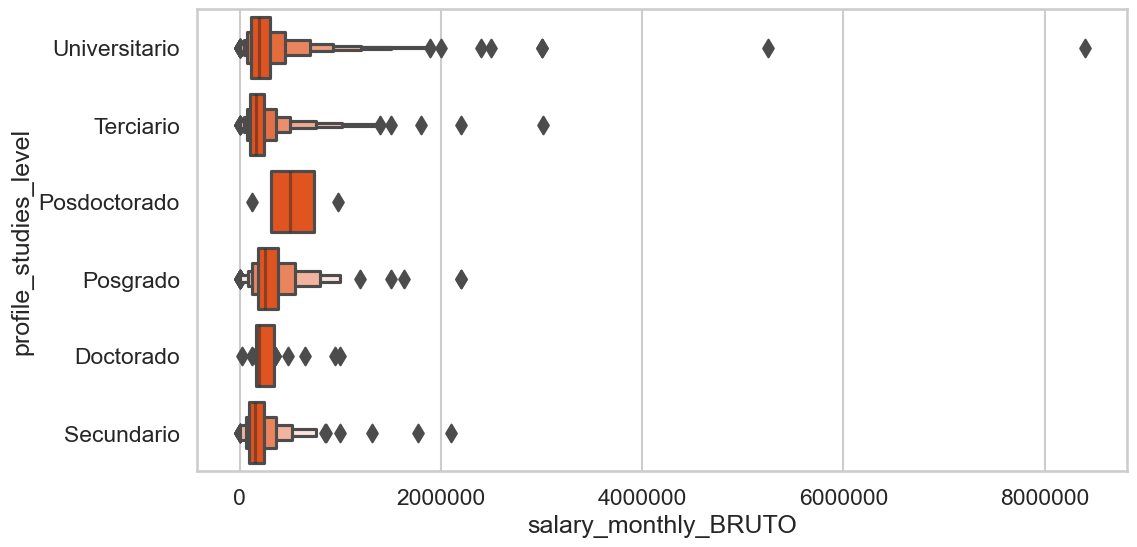

In [34]:
plt.figure(figsize=(12, 6))
seaborn.boxenplot(data=df, x=salary_col, y='profile_studies_level',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

## Eliminación de valores extremos

### Usando percentiles 

Una forma conservadora de eliminar valores extremos que estén afectando a la media, el rango y las visualizaciones es seleccionar un cierto porcentaje más extremo. Para eso, usamos los percentiles.

Por ejemplo, podemos elegir quedarnos con el 99% de salarios más bajos, eliminando el 1%. Podemos calcular todos los percentiles para decidir cuál sería el más apropiado.

In [35]:
k = 90
percentile_90 = df[salary_col].quantile(k / 100)
n_below = len(df[df[salary_col] < percentile_90])
n_above = len(df[df[salary_col] > percentile_90])
print('Percentil {} de la columna {}: {}'.format(k, salary_col, percentile_90))
print('% de datos menor que percentil {}: {}'.format(k, n_below / len(df)))
print('% de datos mayor que percentil {}: {}'.format(k, n_above / len(df)))

Percentil 90 de la columna salary_monthly_BRUTO: 500000.0
% de datos menor que percentil 90: 0.8860608131192347
% de datos mayor que percentil 90: 0.09275708916979843


In [36]:
df[salary_col].quantile([.95, .98, .99, .995, .998])

0.950     750000.0
0.980    1100000.0
0.990    1403604.0
0.995    1800000.0
0.998    2265100.0
Name: salary_monthly_BRUTO, dtype: float64

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='salary_monthly_BRUTO'>

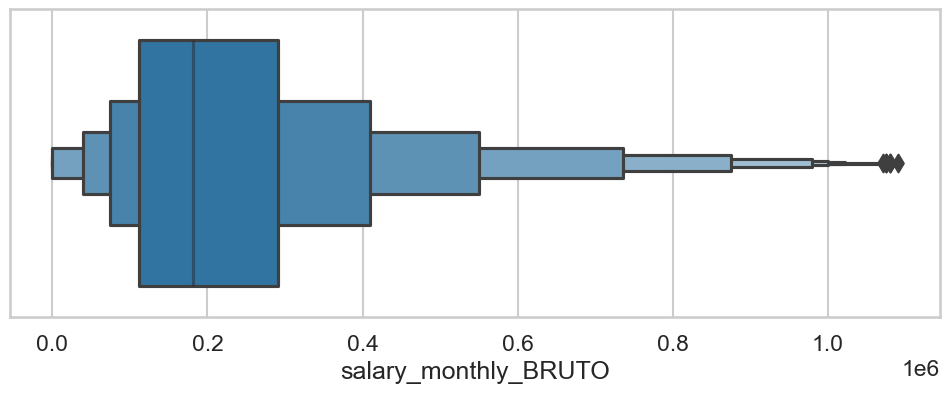

In [37]:
plt.figure(figsize=(12, 4))
max_limit = df[salary_col].quantile(.98)
seaborn.boxenplot(x=df[df[salary_col] < max_limit][salary_col])

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='salary_monthly_BRUTO'>

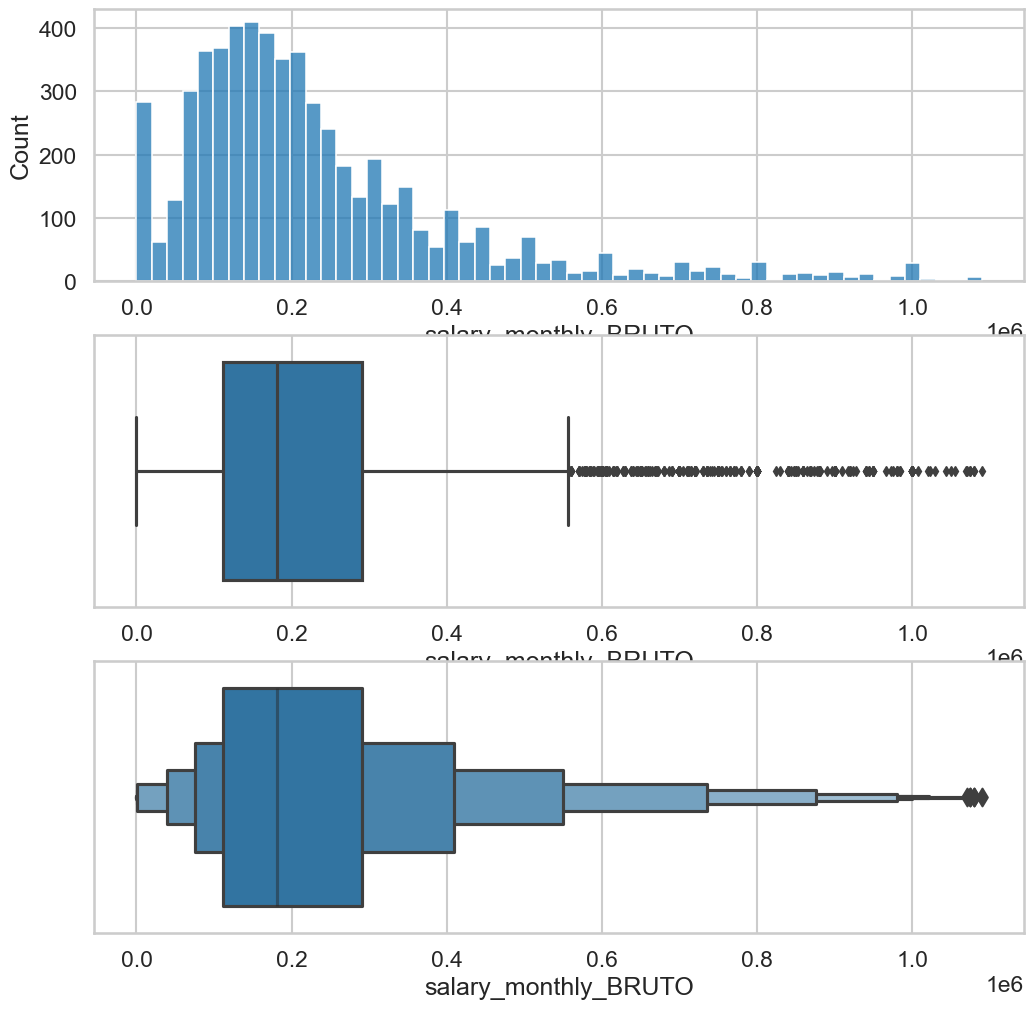

In [38]:
fig, axes = plt.subplots(figsize=(12, 12), nrows=3)
max_limit = df[salary_col].quantile(.98)
data = df[df[salary_col] < max_limit][salary_col]
seaborn.histplot(x=data, ax=axes[0])
seaborn.boxplot(x=data, ax=axes[1])
seaborn.boxenplot(x=data, ax=axes[2])

### Rango itercuartílico

In [39]:
def clean_outliers_q3(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (interesting_col <= (2.5 * interesting_col.quantile(.75)))
    return dataset[mask_outlier]

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='salary_monthly_BRUTO', ylabel='Count'>

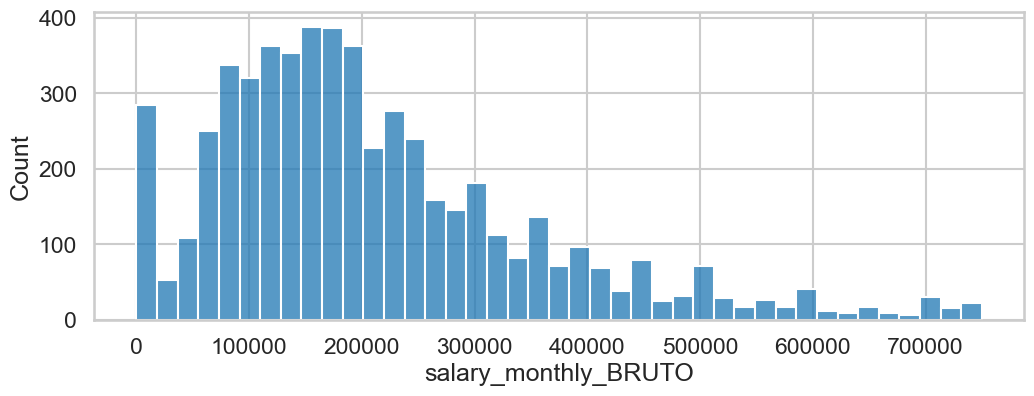

In [40]:
fig = plt.figure(figsize=(12, 4))
data = clean_outliers_q3(df, salary_col)[salary_col]
seaborn.histplot(x=data)

In [41]:
def clean_outliers_sd(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        numpy.abs(interesting_col - interesting_col.mean()) <=
        (2.5 * interesting_col.std()))
    return dataset[mask_outlier]

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='salary_monthly_BRUTO', ylabel='Count'>

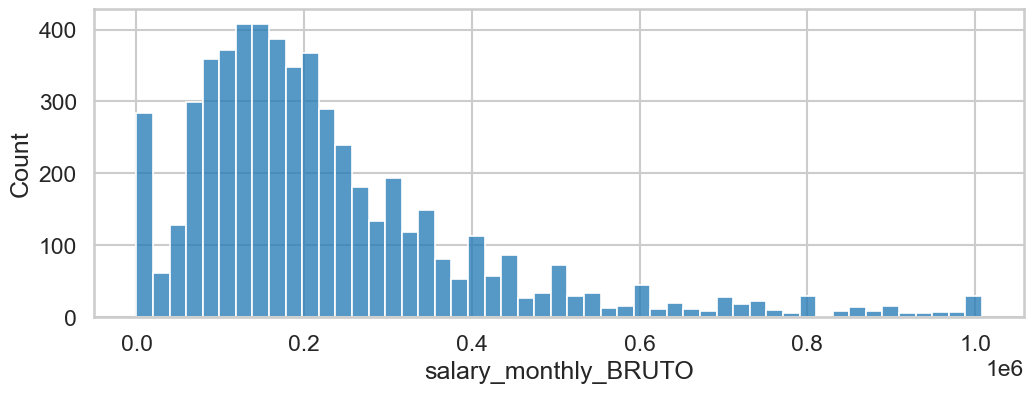

In [42]:
fig = plt.figure(figsize=(12, 4))
data = clean_outliers_sd(df, salary_col)[salary_col]
seaborn.histplot(x=data)

### ¡Mirando los datos!

¿Quiénes son los que cobran tanto?

In [43]:
df[df[salary_col] > df[salary_col].quantile(0.98)]

,work_province,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,...,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,work_lastyear_discrimination,¿Salir o seguir contestando?.3,company_days_in_the_office,company_pandemic_support,company_new_benefits,profile_age,profile_gender,salary_monthly_BRUTO_1
170,Ciudad Autónoma de Buenos Aires,Remoto (empresa de otro país),1600000.0,1000000.0,"Cobro en dólares, Cobro parte de mi sueldo en ...",NaN,4,4,Un sueldo,Mix de las anteriores,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,Varón Cis,1600000
205,Ciudad Autónoma de Buenos Aires,Remoto (empresa de otro país),1100400.0,1100400.0,Cobro en dólares,NaN,4,4,De uno a tres sueldos,Performance individual,...,NaN,No,Alguna vez,Quiero responder más preguntas,1.0,10.0,Ninguna de las anteriores,27,Varón Cis,1100400
206,Ciudad Autónoma de Buenos Aires,Remoto (empresa de otro país),1340000.0,NaN,Cobro en dólares,NaN,3,3,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,Varón Cis,1340000
237,Ciudad Autónoma de Buenos Aires,Remoto (empresa de otro país),4000000.0,3600000.0,Cobro en dólares,210,4,4,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,Varón Cis,4000000
258,Ciudad Autónoma de Buenos Aires,Remoto (empresa de otro país),1200000.0,1200000.0,Cobro en dólares,NaN,4,4,No,Performance de la compañía,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,Varón Cis,1200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5501,Santa Fe,Remoto (empresa de otro país),1160300.0,1074843.0,Cobro en dólares,205,4,4,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,Heterosexual,1160300
5679,Santa Fe,Remoto (empresa de otro país),1200000.0,1000000.0,Cobro parte de mi sueldo en otro país,213,4,4,Un sueldo,Performance individual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,Mujer Cis,1200000
5760,Santa Fe,Remoto (empresa de otro país),1300000.0,1200000.0,Cobro en dólares,215,4,4,Menos de un sueldo,Performance individual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,Varón Cis,1300000
5800,Tucumán,Full-Time,2000000.0,165000.0,NaN,NaN,3,3,De uno a tres sueldos,Performance individual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,Varón Cis,2000000


**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).